<img src="Capture.PNG">

# 0. Introduction

Goal: help the MLcharity identify potential donors as well as reduce the overhead cost of sending mails. <br>

Concretely, it has been found that all the previous donors made more than 50,000 dollars every year, so we plan to use the income level (earn more than $50,000 or less than that) to determine if we will send an advertisement mail. But it is difficult to get income information from public sources. Thus, in this project, we will build a model for income prediction using the existing U.S. census dataset including the income information.



# 1. Data Loading

In [1]:
# Load libraries
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv("census.csv")
print(type(data))



<class 'pandas.core.frame.DataFrame'>


# 2. Exploratory Data Analysis (EDA)

In [3]:
# Load libraries
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split

%matplotlib inline

## 2.1 Basic Info. of Data

In [4]:
# Get a sense about how the original data set looks like
display(data.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [5]:
# check data size, missing value, and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [6]:
# Check if the data set is balanced or imbalanced

n_records = data.shape[0]

# Number of records where individual's income is more than $50,000
incomes = data['income'].value_counts().to_dict()
n_greater_50k = incomes['>50K']

# Number of records where individual's income is at most $50,000
n_at_most_50k = incomes['<=50K']

# Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k / (n_greater_50k + n_at_most_50k)

print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.1f}%".format(greater_percent*100))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.8%


## 2.2 Data Split and Encoding

In [7]:
# Before any exploration, split the data to training set and test set to keep the test data clean

# Step1: Split dataset to input feature set and output income set. (for EDA)
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Step2: The dataset is "deep" copied, and the categorical features are encoded before split
# to make training set and test set have the same categories, e.g. the country variable in training set has
# 30 different countries, while the variable in test set includes only 28 countries. (for training)
income_encoded = income_raw.apply(lambda x: int(x == '>50K'))
features_encoded = pd.get_dummies(data=features_raw)

In [8]:
# Step3: Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, 
                                                    income_encoded,
                                                    test_size = 0.2, 
                                                    random_state = 0)


In [9]:
# Show 10 examples of feature data for training
X_train.head(10)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
13181,47,10.0,0.0,0.0,50.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10342,49,9.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
20881,21,11.0,0.0,0.0,36.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
24972,39,14.0,0.0,1977.0,45.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43867,35,10.0,0.0,0.0,50.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4124,40,9.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
17641,21,10.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
17273,58,7.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
41191,25,13.0,0.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5386,34,13.0,0.0,0.0,38.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
# Select the raw/non-encoded training data set by the same row indices (generated in the split procedure)

# Get indices of X_train
Xtrain_indices = X_train.index.tolist()
# Extract the raw training data with the indices
features_raw_train = features_raw.loc[Xtrain_indices]
income_raw_train = income_raw.loc[Xtrain_indices]


In [11]:
# Show 10 examples of raw feature data for EDA
features_raw_train.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
13181,47,Private,Some-college,10.0,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,50.0,United-States
10342,49,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0.0,0.0,40.0,United-States
20881,21,Private,Assoc-voc,11.0,Never-married,Other-service,Own-child,White,Female,0.0,0.0,36.0,United-States
24972,39,Local-gov,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,1977.0,45.0,United-States
43867,35,Private,Some-college,10.0,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,50.0,United-States
4124,40,Private,HS-grad,9.0,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0.0,0.0,40.0,United-States
17641,21,Private,Some-college,10.0,Never-married,Sales,Not-in-family,White,Male,0.0,0.0,40.0,United-States
17273,58,Private,11th,7.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
41191,25,State-gov,Bachelors,13.0,Never-married,Sales,Not-in-family,White,Female,0.0,0.0,40.0,United-States
5386,34,State-gov,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,38.0,United-States


In [12]:
# Show 10 examples of raw income/output data for EDA
income_raw_train.head(10)

13181    <=50K
10342    <=50K
20881    <=50K
24972     >50K
43867    <=50K
4124     <=50K
17641    <=50K
17273    <=50K
41191    <=50K
5386      >50K
Name: income, dtype: object

## 2.3 Analysis of Numerical and Categorical Features

In [13]:
# Check which features are numerical and which features are categorical
numerical_features = []
categorical_features = []
for col in features_raw_train.columns.tolist():
    if features_raw_train[col].dtypes != 'object':
        numerical_features.append(col)
    else:
        categorical_features.append(col)
print('numerical features: ', numerical_features)
print('categorical features: ', categorical_features)

numerical features:  ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical features:  ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


### 2.3.1 Analysis of Numerical Features

In [14]:
# Show various summary statistics of the numerical data
features_raw_train.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000
mean,38.589601,10.116759,1127.154076,88.567681,40.943307
std,13.208643,2.550967,7652.841906,404.625986,11.926616
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [15]:
# Split the whole feature data set to two groups with different income level ('>50 K' and '<=50 K')
high_salary_indices = income_raw_train.index[income_raw_train == '>50K'].tolist()
low_salary_indices = income_raw_train.index[income_raw_train == '<=50K'].tolist()

high_salary_features = features_raw_train.loc[high_salary_indices, :]
low_salary_features = features_raw_train.loc[low_salary_indices, :]

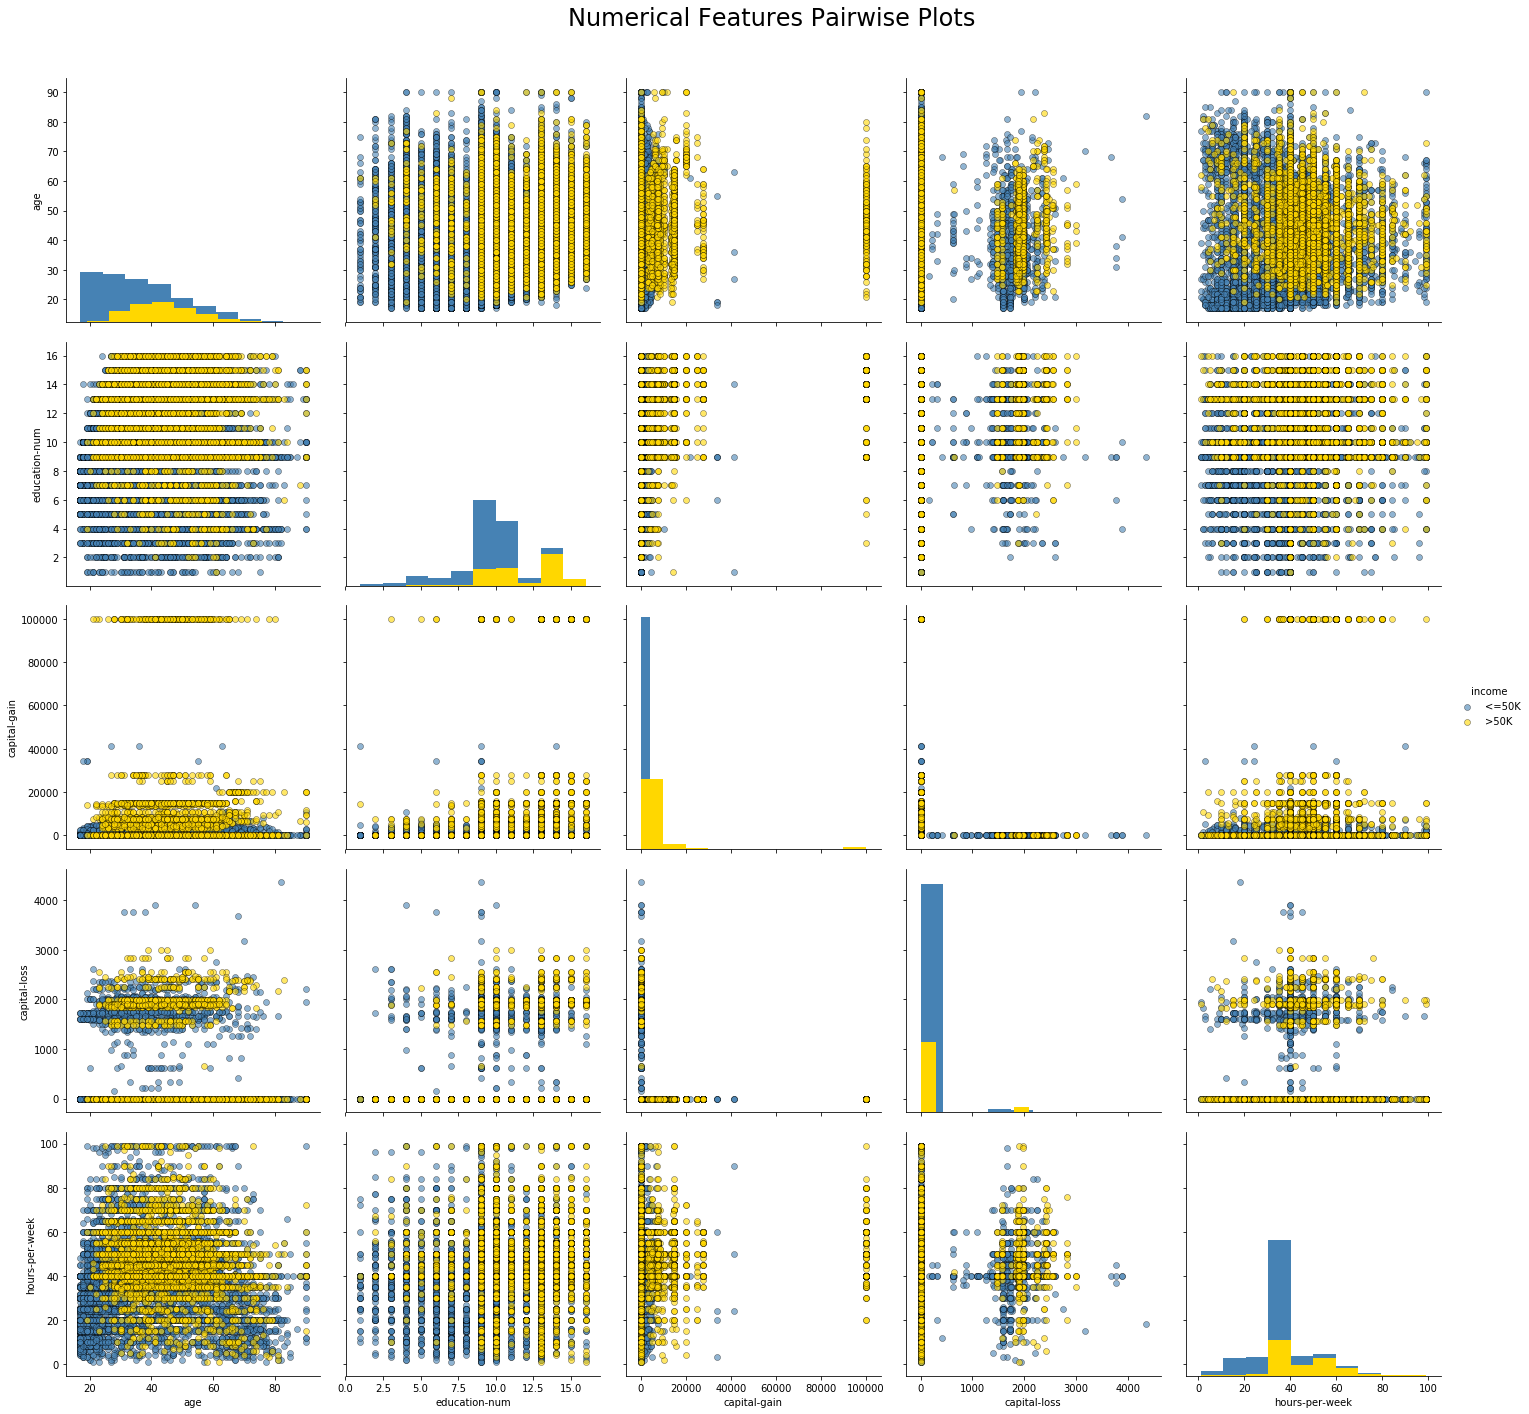

In [16]:
# Pairwise plot: distribution of single variables and relationships between two variables (or the separated clusters)
# For each of numerical features, the distribution of high-income group and low-income group are presented in the diagonol
# Also, the scatter plots show the correlation between each numerical feature pair
data_train = data.loc[y_train.index.tolist(), :]
pp = sns.pairplot(data_train, vars=numerical_features, hue='income', height=4, aspect=1, 
                  palette={'<=50K': "steelblue", '>50K': "gold"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5, alpha=0.6), diag_kind = 'hist')
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.1)
t = fig.suptitle('Numerical Features Pairwise Plots', fontsize=24)

__Insights from the plots:__ <br>
1) Left-skewed distribution: capital-loss and capital-gain <br>
2) The distributions on the diagonol show that people with high income tend to be older and have relatively longer education time than the people with low income <br>
3) We see that capital gain and education number are positively correlated showing that people with longer education time tend to have more capital gain (although this does not prove that one causes the other). <br>

### 2.3.2 Analysis of Categorical Features

In [17]:
# For each categorical feature, the distribution of high-income group is compared with that of low-income group

def cat_distribution(data_train, cat_feature):
    sns.set(font_scale=1.8)
    pp = sns.catplot(x=cat_feature, hue="income", kind="count",
                     palette={'<=50K': "steelblue", '>50K': "gold"}, edgecolor=".6",
                     data=data_train, height = 6, aspect = 2.6)
    pp.set_xticklabels(rotation=38)

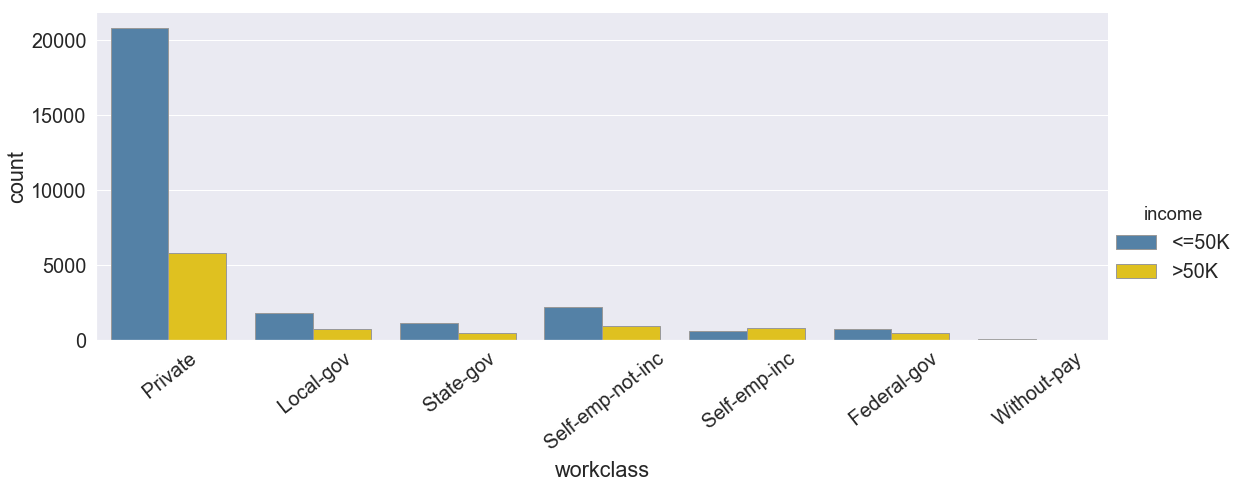

In [18]:
cat_distribution(data_train, categorical_features[0])

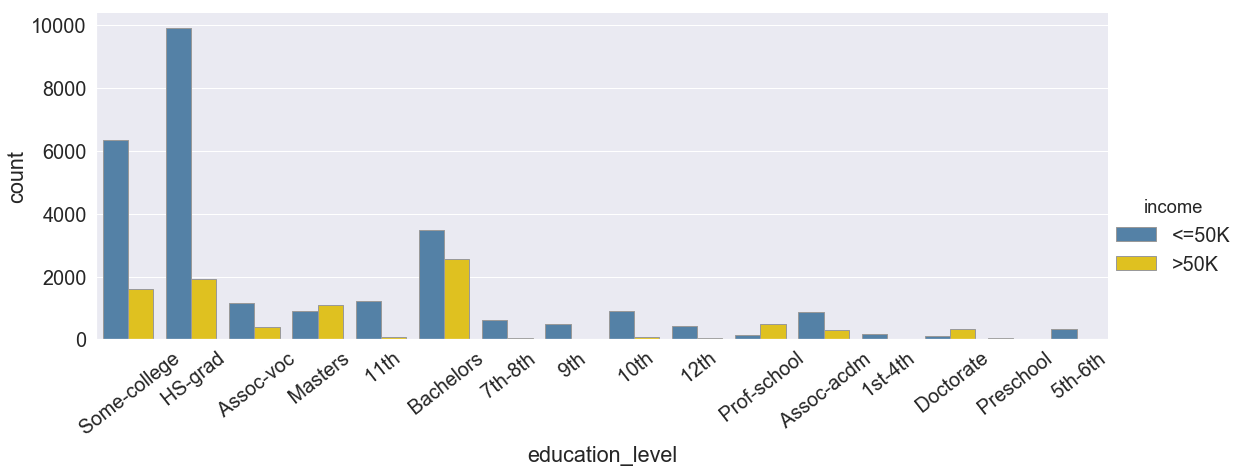

In [19]:
cat_distribution(data_train, categorical_features[1])

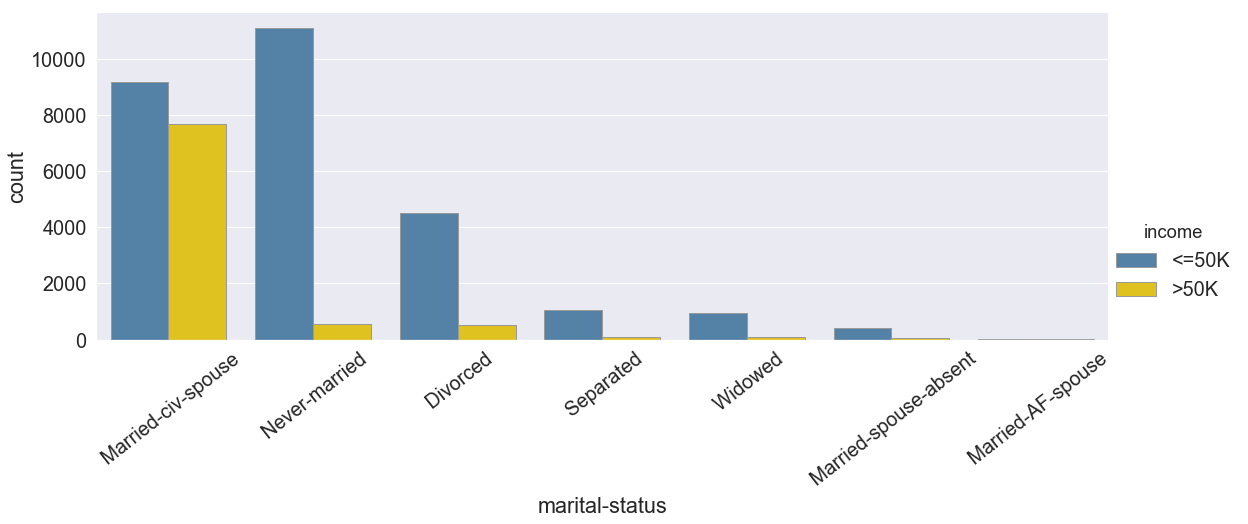

In [20]:
cat_distribution(data_train, categorical_features[2])

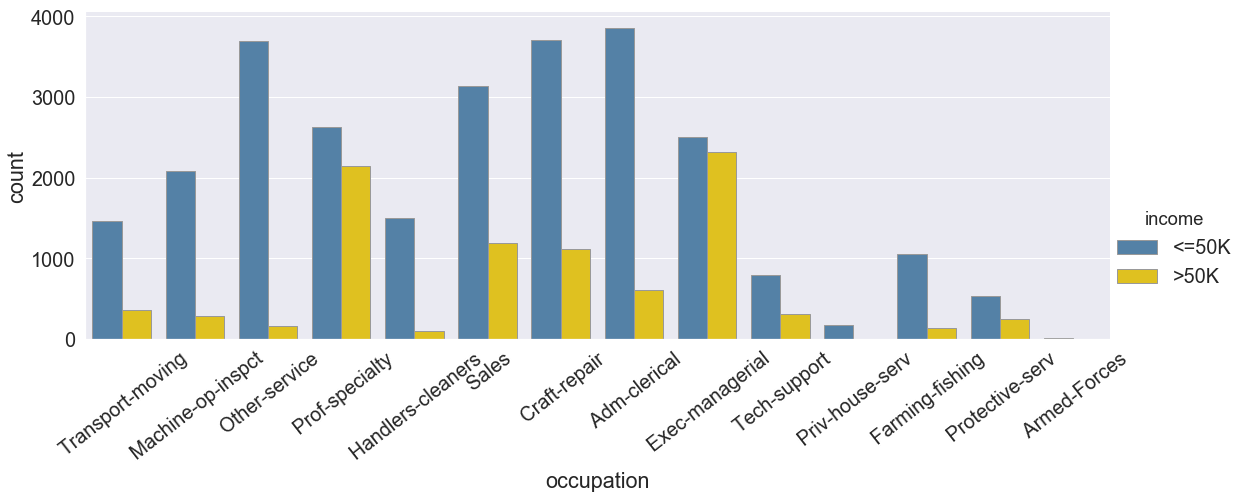

In [21]:
cat_distribution(data_train, categorical_features[3])

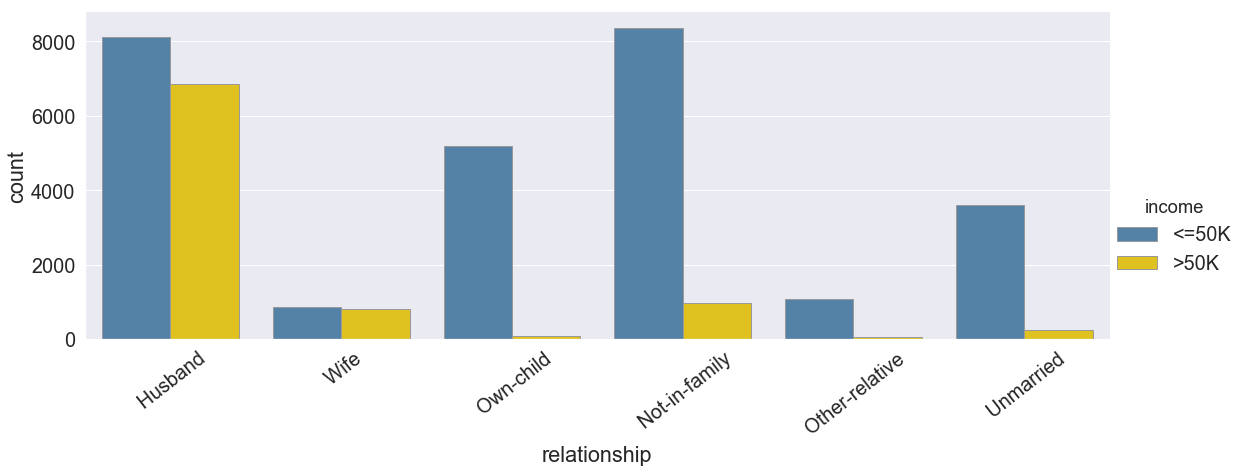

In [22]:
cat_distribution(data_train, categorical_features[4])

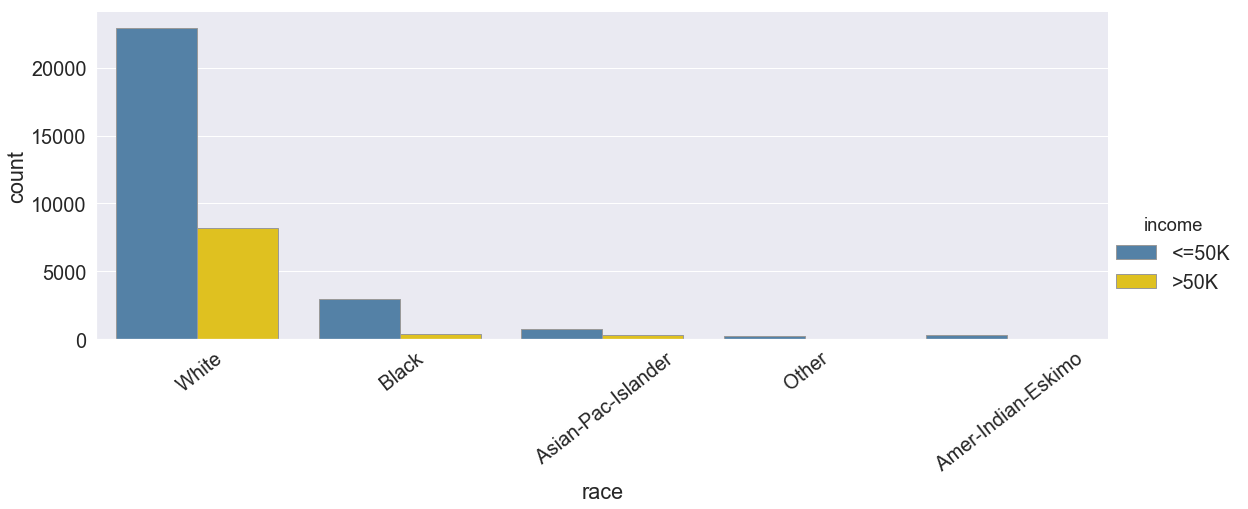

In [23]:
cat_distribution(data_train, categorical_features[5])

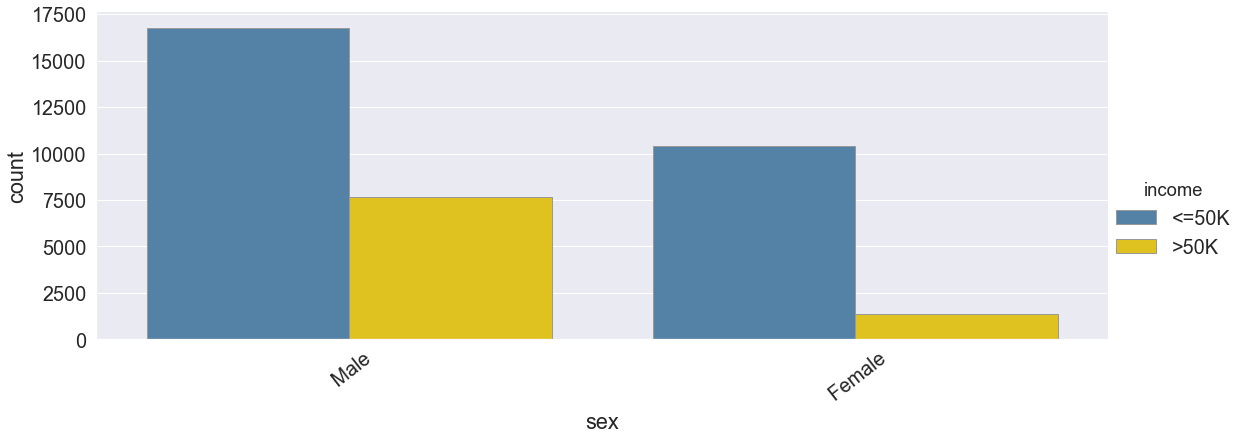

In [24]:
cat_distribution(data_train, categorical_features[6])

__Insights from the plots:__ <br>
1) If the conditional distributions look similar, there is no or only a weak association between the two variables. <br>
2) As for the marital status, married civilians account for a majority of all the high income cases, while the majority of the low income cases include married civilians, never married people, and divorced people. It suggests that there is a relationship between the marital status and the income.

# 3. Data Cleaning and Feature Engineering

In [25]:
# load libraries
from sklearn.preprocessing import StandardScaler

## 3.1. Transforming Skewed Continuous Features

Two numerical variables () have skewed distributions. <br>
In this section, I log-transformed the two variables and visualized the distributions before and after log-transformation.

In [26]:
# Function to visualize the feature distributions before and after log-transformation

def distribution(data, transformed = False):
    
    # Create figure
    fig = plt.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate(['capital-gain','capital-loss']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#FF9999')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()

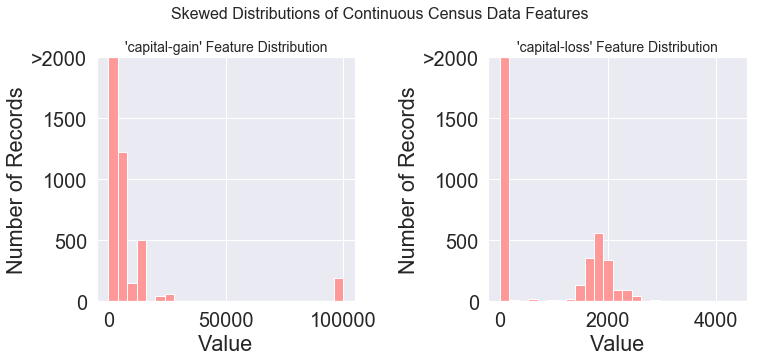

In [27]:
# Distributions before log-transformation
distribution(X_train)

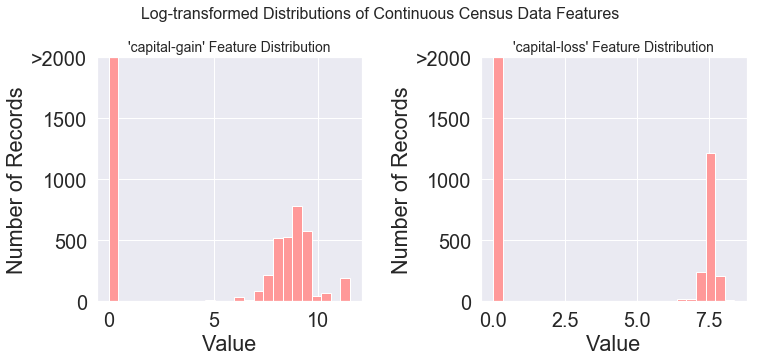

In [28]:
# Distributions after log-transformation
skewed = ['capital-gain', 'capital-loss']
X_train_log = X_train.copy(deep=True)
X_train_log[skewed] = X_train_log[skewed].apply(lambda x: np.log(x + 1))
distribution(X_train_log, transformed = True)

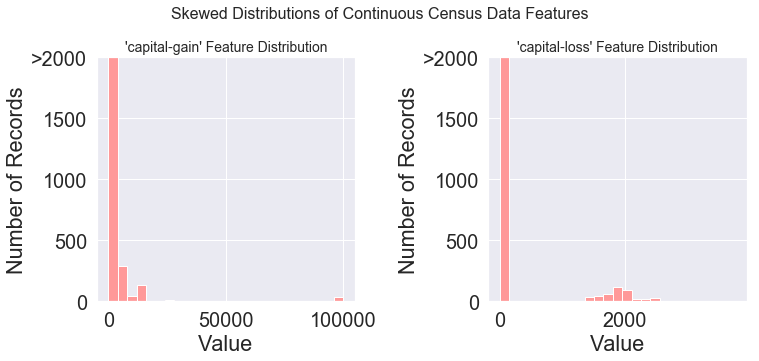

In [29]:
# The preprocessing procedures need to be done on test data also:
# 1) So the test data can be fed into the model.
# 2) Also, the preprocessing can be thought of as a portion of the final training model (has info. of traing set)
distribution(X_test)

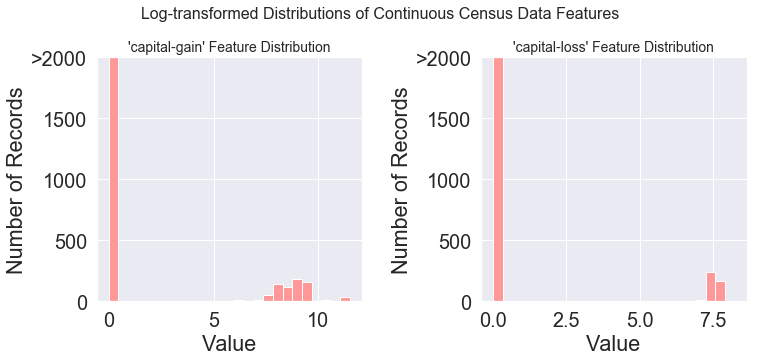

In [30]:
X_test_log = X_test.copy(deep=True)
X_test_log[skewed] = X_test_log[skewed].apply(lambda x: np.log(x + 1))
distribution(X_test_log, transformed = True)

## 3.2. Standardizing Numerical Features

In [31]:
# Initialize a scaler, then apply it to the features (training data)
scaler = StandardScaler()

X_train_log_norm = X_train_log.copy(deep=True)
X_train_log_norm['age'] = X_train_log_norm['age'].astype('float64')
scaler.fit(X_train_log_norm[numerical_features])
X_train_log_norm[numerical_features] = scaler.transform(X_train_log_norm[numerical_features])

# Show examples of data with scaling applied
display(X_train_log_norm.head(n = 10))
processed_Xtrain = X_train_log_norm

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
13181,0.636743,-0.045771,-0.301209,-0.222888,0.759379,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10342,0.788161,-0.437785,-0.301209,-0.222888,-0.079094,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
20881,-1.331692,0.346242,-0.301209,-0.222888,-0.414483,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
24972,0.031071,1.522284,-0.301209,4.531401,0.340143,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43867,-0.271765,-0.045771,-0.301209,-0.222888,0.759379,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4124,0.106780,-0.437785,-0.301209,-0.222888,-0.079094,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
17641,-1.331692,-0.045771,-0.301209,-0.222888,-0.079094,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
17273,1.469543,-1.221812,-0.301209,-0.222888,-0.079094,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
41191,-1.028856,1.130270,-0.301209,-0.222888,-0.079094,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5386,-0.347474,1.130270,-0.301209,-0.222888,-0.246788,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
# Apply the previous scaler to the features (test data)
# Note: we can't run the fitting again here. 
# All the preprocessing and training procedures should only include the information of training data. 
X_test_log_norm = X_test_log.copy(deep=True)
X_test_log_norm['age'] = X_test_log_norm['age'].astype('float64')
X_test_log_norm[numerical_features] = scaler.transform(X_test_log_norm[numerical_features])

# Show examples of data with scaling applied
display(X_test_log_norm.head(n = 10))
processed_Xtest = X_test_log_norm

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
41387,-1.180274,0.738256,-0.301209,-0.222888,0.340143,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
35278,-0.423183,-0.437785,-0.301209,-0.222888,1.178615,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
26950,0.031071,-0.045771,-0.301209,-0.222888,-0.246788,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
29133,0.409616,-1.221812,-0.301209,-0.222888,-0.079094,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
41794,-0.574601,-0.437785,-0.301209,-0.222888,-0.079094,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
39744,1.848088,-0.437785,-0.301209,-0.222888,-0.079094,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32755,-0.953147,-0.437785,-0.301209,-0.222888,-0.079094,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6016,-1.028856,0.346242,3.833494,-0.222888,-0.079094,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
43034,-1.331692,-0.045771,-0.301209,-0.222888,-0.498330,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
12446,-0.271765,1.130270,-0.301209,-0.222888,-0.079094,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Double check that the standardization procedures don't change the other columns:

In [33]:
processed_Xtrain.iloc[:, 5:].equals(X_train.iloc[:, 5:])

True

In [34]:
processed_Xtest.iloc[:, 5:].equals(X_test.iloc[:, 5:])

True

# 4. Model Selection

In [51]:
# load libraries
import warnings
warnings.filterwarnings('ignore')
from time import time
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer

## 4.1 Accuracy and F-Score Analysis

In [36]:
# Function for visualizing learning curves of different models

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scorer='accuracy'):
    """
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scorer)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(True)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

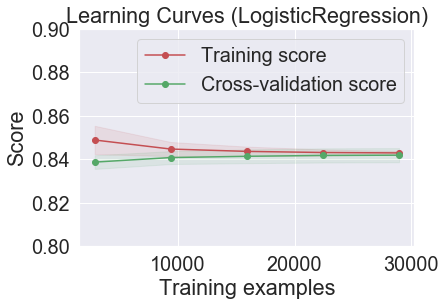

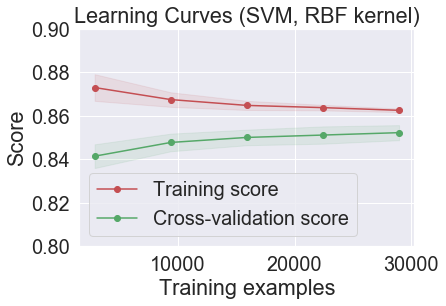

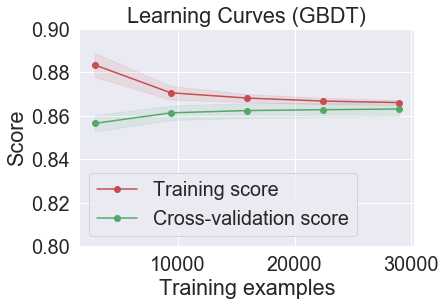

In [37]:
# Accuracy learning curves for logistic regression, SVM, and GBDT

title = "Learning Curves (LogisticRegression)"
cv1 = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
estimator1 = LogisticRegression(random_state=2)
plot_learning_curve(estimator1, title, processed_Xtrain, y_train, ylim=(0.8, 0.90), cv=cv1, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel)"
cv2 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=3)
estimator2 = SVC(gamma=0.1, random_state=4)
plot_learning_curve(estimator2, title, processed_Xtrain, y_train, ylim=(0.8, 0.90), cv=cv2, n_jobs=4)


title = "Learning Curves (GBDT)"
cv3 = ShuffleSplit(n_splits=100, test_size=0.2, random_state=5)
estimator3 = GradientBoostingClassifier(random_state=6)
plot_learning_curve(estimator3, title, processed_Xtrain, y_train, (0.8, 0.90), cv=cv3, n_jobs=4)

plt.show()

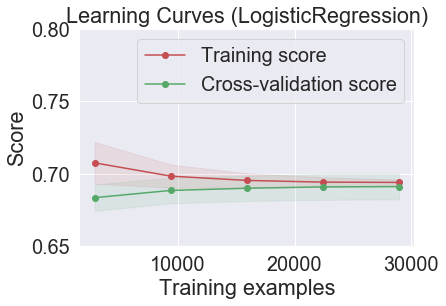

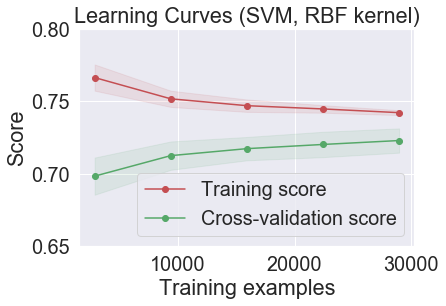

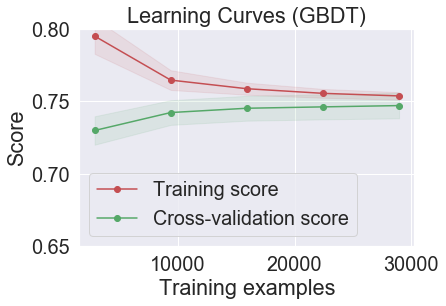

In [38]:
# F-score learning curves for logistic regression, SVM, and GBDT

title = "Learning Curves (LogisticRegression)"
plot_learning_curve(estimator1, title, processed_Xtrain, y_train, ylim=(0.65, 0.80), cv=cv1, n_jobs=4, \
                    scorer=make_scorer(fbeta_score, beta=0.5))

title = "Learning Curves (SVM, RBF kernel)"
plot_learning_curve(estimator2, title, processed_Xtrain, y_train, ylim=(0.65, 0.80), cv=cv2, n_jobs=4, \
                    scorer=make_scorer(fbeta_score, beta=0.5))


title = "Learning Curves (GBDT)"
plot_learning_curve(estimator3, title, processed_Xtrain, y_train, (0.65, 0.80), cv=cv3, n_jobs=4, \
                    scorer=make_scorer(fbeta_score, beta=0.5))

plt.show()

__Insights from the accuracy/F-score analyses:__ <br>
1) Logistic regression: the two curves have converged. Also, both validation set and training set have relatively low scores. It suggests the model has poor fit or high bias problem. At this time, the performance won't get improved no matter how much data we feed into the model. <br>
2) SVM: there is a gap between two curves although the overall scores of SVM are higher than logistic regression's scores. The score of training set is higher than that of validation set. It suggests poor generalization or high variance problem. At this time, feeding more data into the model will help improve the performance. Or we can improve the generalization by tuning the hyper-parameters of SVM. We might still be able to get good generalization from the SVM model. <br>
3) GBDT: the two curves converge well. Also, the scores of GBDT are high. It suggests good fitting and generalization. <br>

## 4.2 Training Time Analysis

In [39]:
# Function for training time calculation with different models

def train_predict(learner, sample_size, X_train, y_train): 
    '''
    Parameters
    ----------
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data and record the time
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the traing set
    start = time() # Get start time
    predictions_train = learner.predict(X_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start

    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    
    return results

In [40]:
# Calculate the different sample sizes for the training data
sample_sizes = (((np.linspace(.1, 1.0, 5))*len(y_train)).astype(int)).tolist()

# Collect training time results on the learners
results = {}
for clf in [estimator1, estimator2, estimator3]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for sample_size in sample_sizes:
        results[clf_name][sample_size] = \
        train_predict(clf, sample_size, processed_Xtrain, y_train)

LogisticRegression trained on 3617 samples.
LogisticRegression trained on 11757 samples.
LogisticRegression trained on 19897 samples.
LogisticRegression trained on 28037 samples.
LogisticRegression trained on 36177 samples.
SVC trained on 3617 samples.
SVC trained on 11757 samples.
SVC trained on 19897 samples.
SVC trained on 28037 samples.
SVC trained on 36177 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 11757 samples.
GradientBoostingClassifier trained on 19897 samples.
GradientBoostingClassifier trained on 28037 samples.
GradientBoostingClassifier trained on 36177 samples.


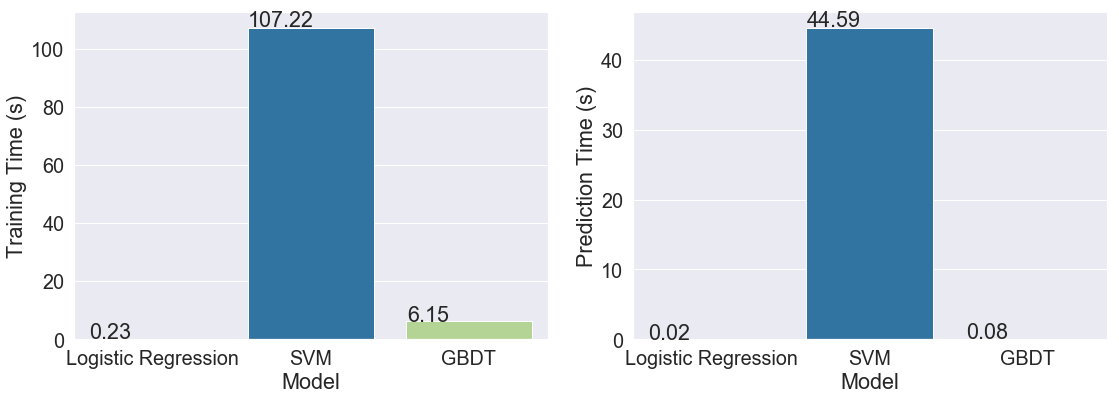

In [41]:
# Visualization of the training time results

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))

data1 = {'Model': ['Logistic Regression', 'SVM', 'GBDT'], 'Training Time (s)': []}
data2 = {'Model': ['Logistic Regression', 'SVM', 'GBDT'], 'Prediction Time (s)': []}
for clf_result in results.values():
    data1['Training Time (s)'].append(clf_result[sample_sizes[-1]]['train_time'])
    data2['Prediction Time (s)'].append(clf_result[sample_sizes[-1]]['pred_time'])
df1 = pd.DataFrame(data=data1)
sns.barplot(x = 'Model', y = 'Training Time (s)', data=df1, ax=ax1, palette="Paired")

for p in ax1.patches:
    val = '{:.2f}'.format(p.get_height())
    ax1.annotate(val, (p.get_x() * 1.005, p.get_height() * 1.005))


df2 = pd.DataFrame(data=data2)
sns.barplot(x = 'Model', y = 'Prediction Time (s)', data=df2, ax=ax2, palette = "Paired")

for p in ax2.patches:
    val = '{:.2f}'.format(p.get_height())
    ax2.annotate(val, (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()

__Insights from the training time analyses:__ <br>
SVM is inherently slow although the kernel trick can help save a lot of time. In the current case, SVM tooks much more time than the other two algorithms in both training and prediction steps. <br>

Thus, GBDT is finally selected as the model for this prediction problem.

# 5. Hyper-Parameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
# Build a basic GBDT classifier

clf = GradientBoostingClassifier(random_state = 8, learning_rate = 0.1, n_estimators = 500)

# Create the parameters list for tuning
parameters = {'max_depth': [3, 4, 5], 'subsample': [0.5, 0.75, 1], 'max_depth': [4, 6, 8, 10]}

# Make an fbeta_score scoring object as the metric for tuning
scorer = make_scorer(fbeta_score, beta = 0.5)

# Perform grid search on the classifier
grid_obj = GridSearchCV(clf, parameters, scoring = scorer, cv = 5)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(processed_Xtrain, y_train)

# Get the best estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and optimized model
predictions = (clf.fit(processed_Xtrain, y_train)).predict(processed_Xtest)
best_predictions = best_clf.predict(processed_Xtest)

# Report the before-and-after scores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8719
F-score on testing data: 0.7547

Optimized Model
------
Final accuracy score on the testing data: 0.8725
Final F-score on the testing data: 0.7554


# 6. Analysis of Feature Importance

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone

In [45]:
# Function for visualization of feature importance

def feature_plot(importances, X_train, y_train):
    
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (12,6))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 24)
    plt.xlabel("Feature", fontsize = 24)
    plt.xticks(rotation = 20)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  


In [46]:
# Train the random forest model on the training set
model = RandomForestClassifier(random_state = 14)
model.fit(processed_Xtrain, y_train)

# Extract the feature importances from the random forest model
importances = model.feature_importances_

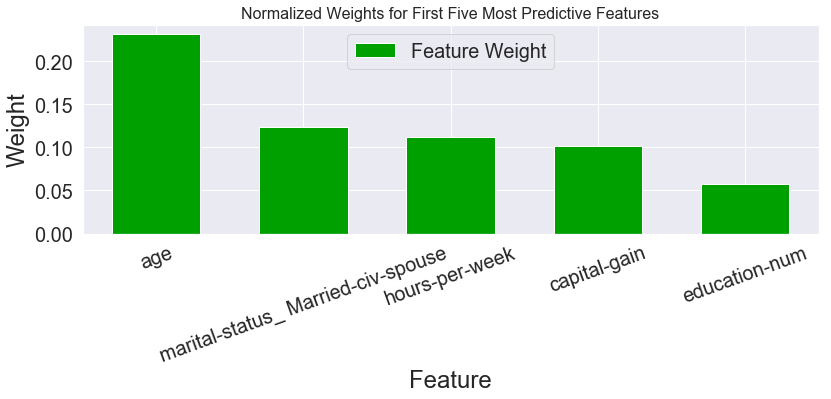

In [47]:
# Display the five most important features
feature_plot(importances, processed_Xtrain, y_train)

In [50]:
# Reduce the feature space
reduced_Xtrain = processed_Xtrain[processed_Xtrain.columns.values[(np.argsort(importances)[::-1])[:5]]]
reduced_Xtest = processed_Xtest[processed_Xtest.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
start = time()
clf = (clone(best_clf)).fit(reduced_Xtrain, y_train)
end = time()

# Make new predictions
reduced_predictions = clf.predict(reduced_Xtest)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Time used for training: {:.4f} s".format(results['GradientBoostingClassifier'][36177]['train_time']))
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

print("\nFinal Model trained on reduced data\n------")
print("Time used for training: {:.4f} s".format(end-start))
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Time used for training: 6.1533 s
Accuracy on testing data: 0.8725
F-score on testing data: 0.7554

Final Model trained on reduced data
------
Time used for training: 4.6205 s
Accuracy on testing data: 0.8499
F-score on testing data: 0.7026


__Insights from the feature importance analyses:__ <br>
Although the reduced data set can save 25% time in the training procedure, both accuracy (3%) and F-score (7%) decrease. Considering that the 6.2 s training time is not long, I will choose to use the full data set for training in this prediction problem.

# 7. Conclusion

* Used a supervised learning model to identify potential donors with the U.S. census data <br>
* Performed exploratory data analysis, data cleansing, and feature engineering <br>
* Created a training and predicting pipeline to train and evaluate multiple classification models (logistic regression, SVM, GBDT) <br>
* Used cross validation and grid search to tune the hyperparameters of the chosen model (GBDT), leading to an F-score of 76% and an accuracy of 87% <br>
* Selected five most relevant features by importance, and retrained the GBDT model with the reduced dataset, leading to a 25% decrease in training time with 7% F-score decrease and 3% accuracy reduction